In [1]:
from os import path
import os
import pandas as pd
import numpy as np
import requests, zipfile, io, os
pd.set_option('display.max_colwidth', -1)
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import re
import seaborn as sns

/var/folders/mk/7yynft554x38v3t6f_65fkzc0000gn/T/ipykernel_29161/3265537112.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
df_results = pd.read_csv('AllRegion_Results.csv') 
df_results

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Evaporation WB 0.4%,Evaporation MCDB 0.4%,Evaporation WB 1%,Evaporation MCDB 1%,Evaporation WB 2%,Evaporation MCDB 2%,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW
0,Esperanza.Base-Hope.Bay ARG ATA,"['-56.99730', '-63.39810', '3.0']",https://climate.onebuilding.org/WMO_Region_7_Antarctica/ATA_Antarctica/ATA_ARG_Esperanza.Base-Hope.Bay.889630_TMYx.2007-2021.zip,889630,2021,Antarctica,NaN,BASE ESPERANZA,99999,63.3989S,...,4.7,7.5,3.9,6.4,3.2,5.4,-22.8964,-21.100,7.6000,6.741
1,Esperanza.Base-Hope.Bay ARG ATA,"['-56.99730', '-63.39810', '3.0']",https://climate.onebuilding.org/WMO_Region_7_Antarctica/ATA_Antarctica/ATA_ARG_Esperanza.Base-Hope.Bay.889630_TMYx.zip,889630,TMYx,Antarctica,NaN,BASE ESPERANZA,99999,63.3989S,...,4.7,7.5,3.9,6.4,3.2,5.4,-22.2964,-21.300,7.3000,6.200
2,Orcadas.Base-Laurie.Island-South.Orkney.Islands ARG ATA,"['-44.73300', '-60.73300', '8.0']",https://climate.onebuilding.org/WMO_Region_7_Antarctica/ATA_Antarctica/ATA_ARG_Orcadas.Base-Laurie.Island-South.Orkney.Islands.889680_TMYx.2004-2018.zip,889680,2018,Antarctica,NaN,BASE ORCADAS,99999,60.7378S,...,4.1,5.3,3.4,4.3,2.8,3.6,-26.8000,-24.241,5.3964,4.300
3,Orcadas.Base-Laurie.Island-South.Orkney.Islands ARG ATA,"['-44.73300', '-60.73300', '8.0']",https://climate.onebuilding.org/WMO_Region_7_Antarctica/ATA_Antarctica/ATA_ARG_Orcadas.Base-Laurie.Island-South.Orkney.Islands.889680_TMYx.2007-2021.zip,889680,2021,Antarctica,NaN,BASE ORCADAS,99999,60.7378S,...,4.1,5.3,3.4,4.3,2.8,3.6,-27.3964,-24.900,4.6000,3.900
4,Orcadas.Base-Laurie.Island-South.Orkney.Islands ARG ATA,"['-44.73300', '-60.73300', '8.0']",https://climate.onebuilding.org/WMO_Region_7_Antarctica/ATA_Antarctica/ATA_ARG_Orcadas.Base-Laurie.Island-South.Orkney.Islands.889680_TMYx.zip,889680,TMYx,Antarctica,NaN,BASE ORCADAS,99999,60.7378S,...,4.1,5.3,3.4,4.3,2.8,3.6,-22.9000,-20.900,6.3000,4.941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,Montreal-Mirabel Intl AP QC CAN,"['-74.03860', '45.68060', '82.3']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/QC_Quebec/CAN_QC_Montreal-Mirabel.Intl.AP.719050_CWEC2016.zip,719050,2016,Canada,QC,KUUJJUARAPIK,99999,55.282N,...,18.3,22.9,17.0,21.0,15.6,19.7,-24.9000,-21.700,28.8000,27.500
30458,Slave Lake AB CAN,"['-114.7800', '55.29000', '582.8']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/AB_Alberta/CAN_AB_Slave.Lake.713690_CWEC2020.zip,713690,2020,Canada,AB,SLAVE LAKE,99999,55.2964N,...,18.8,24.2,17.8,22.8,16.7,21.4,-27.3964,-25.300,26.4000,24.241
30459,Wainwright CFB Airfield AB CAN,"['-111.1000', '52.83000', '686.3']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/AB_Alberta/CAN_AB_Wainwright.CFB.Airfield.711180_CWEC2020.zip,711180,2020,Canada,AB,WAINWRIGHT CFB,99999,52.8305N,...,19.0,26.2,18.0,25.1,17.0,23.7,-28.7000,-26.300,29.8000,28.000
30460,Grand Etang NS CAN,"['-61.05000', '46.55000', '12.5']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/NS_Nova_Scotia/CAN_NS_Grand.Etang.730300_CWEC2020.zip,730300,2020,Canada,NS,GRAND ETANG,99999,46.550N,...,22.4,25.4,21.6,24.4,20.7,23.5,-12.3000,-11.500,26.1000,24.700


In [7]:
df_results['Location Name'].nunique()

11577

In [8]:
df_results['Region_number'] = df_results['WMO'].astype(str).str[:2]

In [9]:
df_results= df_results.sort_values(by=['Region_number'], ascending=False)
df_results.drop(df_results.index[df_results['Region_number'] == 'WM'], inplace = True)
df_results['Region_number']= df_results['Region_number'].astype(str).astype(int,errors='ignore')
df_results.dtypes

Location Name             object 
Coordinates               object 
URL for files             object 
WMO                       int64  
last_year                 object 
Country                   object 
State/Province            object 
Station                   object 
WBAN                      int64  
Latitude                  object 
Longitude                 object 
Heating DB 99.6%          float64
Heating DB 99%            float64
Cooling DB 0.4%           float64
Cooling MCWB 0.4%         float64
Cooling DB 1%             float64
Cooling MCWB 1%           float64
Cooling DB 2%             float64
Cooling MCWB 2%           float64
Evaporation WB 0.4%       float64
Evaporation MCDB 0.4%     float64
Evaporation WB 1%         float64
Evaporation MCDB 1%       float64
Evaporation WB 2%         float64
Evaporation MCDB 2%       float64
Heating DB 99.6% - EPW    float64
Heating DB 99% - EPW      float64
Cooling DB 0.4% - EPW     float64
Cooling DB 1% - EPW       float64
Region_number 

In [14]:
df_results["Region"] = pd.cut(
    x=df_results["Region_number"],
    bins=[0, 29, 59,68,69,79,89,99, np.inf],
    labels=["Europe", "Asia", "Africa","special","North America","South America","Oceania","other"],
)
df_results

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Evaporation WB 1%,Evaporation MCDB 1%,Evaporation WB 2%,Evaporation MCDB 2%,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number,Region
9252,St.Croix-Lime.Tree.Bay SC VIR,"['-64.75400', '17.69500', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/VIR_U_S_Virgin_Islands/VIR_SC_St.Croix-Lime.Tree.Bay.997349_TMYx.zip,997349,TMYx,USA,Virgin Islands,ST CROIX LIME TREE BAY,99999,17.695N,...,NaN,NaN,NaN,NaN,23.6000,23.900,31.1000,30.800,99,Oceania
22712,Cape.Canaveral-Trident.Wharf FL USA,"['-80.59300', '28.41600', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/FL_Florida/USA_FL_Cape.Canaveral-Trident.Wharf.997354_TMYx.2007-2021.zip,997354,2021,USA,FL,CAPE CANAVERAL TRIDENT PIER,99999,28.4160N,...,NaN,NaN,NaN,NaN,8.6036,9.800,31.5000,31.200,99,Oceania
22723,Eagle.Point TX USA,"['-94.92000', '29.48000', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/TX_Texas/USA_TX_Eagle.Point.997361_TMYx.2004-2018.zip,997361,2018,USA,TX,EAGLE POINT,99999,29.481N,...,NaN,NaN,NaN,NaN,4.6000,5.900,32.5000,31.700,99,Oceania
22722,Alpena MI USA,"['-83.42860', '45.06300', '179.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MI_Michigan/USA_MI_Alpena.997359_TMYx.zip,997359,TMYx,USA,MI,ALPENA HARBOR,99999,45.0630N,...,NaN,NaN,NaN,NaN,-14.0000,-12.500,27.9964,25.700,99,Oceania
22721,Alpena.Harbor MI USA,"['-83.42860', '45.06300', '179.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MI_Michigan/USA_MI_Alpena.Harbor.997359_TMYx.2007-2021.zip,997359,2021,USA,MI,ALPENA HARBOR,99999,45.0630N,...,NaN,NaN,NaN,NaN,-13.6000,-12.500,29.4000,26.841,99,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.zip,103340,TMYx,Germany,NaN,WUNSTORF,99999,52.4606N,...,19.7,26.6,18.8,24.8,-9.0000,-6.041,30.0000,27.141,10,Europe
1233,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.2007-2021.zip,103340,2021,Germany,NaN,WUNSTORF,99999,52.4606N,...,19.7,26.6,18.8,24.8,-5.4964,-4.000,30.1964,28.000,10,Europe
1232,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.2004-2018.zip,103340,2018,Germany,NaN,WUNSTORF,99999,52.4606N,...,19.7,26.6,18.8,24.8,-5.0000,-4.200,28.2000,27.000,10,Europe
1231,Diepholz.Dummerland.AP HB DEU,"['8.34250', '52.58810', '43.1']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/HB_Bremen/DEU_HB_Diepholz.Dummerland.AP.103210_TMYx.zip,103210,TMYx,Germany,NaN,DIEPHOLZ,99999,52.5881N,...,19.7,25.5,18.8,24.0,-7.0000,-5.000,28.2000,26.841,10,Europe


In [15]:
#cols = df_results.columns.drop(['Location Name','Coordinates','WMO','last_year','Country','Latitude','Longitude','Region_number','Region'])
#cols
#df_results[cols] = df_results[cols].apply(pd.to_numeric)
#df_results.dtypes

In [16]:
df_results['last_year'] = df_results['last_year'].astype('string')
#df_results['last_year'] = df_results['last_year'].str.replace('TMYx','-')
df_results['last_year'] = df_results['last_year'].str[-4:]

df_results

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Evaporation WB 1%,Evaporation MCDB 1%,Evaporation WB 2%,Evaporation MCDB 2%,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number,Region
9252,St.Croix-Lime.Tree.Bay SC VIR,"['-64.75400', '17.69500', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/VIR_U_S_Virgin_Islands/VIR_SC_St.Croix-Lime.Tree.Bay.997349_TMYx.zip,997349,TMYx,USA,Virgin Islands,ST CROIX LIME TREE BAY,99999,17.695N,...,NaN,NaN,NaN,NaN,23.6000,23.900,31.1000,30.800,99,Oceania
22712,Cape.Canaveral-Trident.Wharf FL USA,"['-80.59300', '28.41600', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/FL_Florida/USA_FL_Cape.Canaveral-Trident.Wharf.997354_TMYx.2007-2021.zip,997354,2021,USA,FL,CAPE CANAVERAL TRIDENT PIER,99999,28.4160N,...,NaN,NaN,NaN,NaN,8.6036,9.800,31.5000,31.200,99,Oceania
22723,Eagle.Point TX USA,"['-94.92000', '29.48000', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/TX_Texas/USA_TX_Eagle.Point.997361_TMYx.2004-2018.zip,997361,2018,USA,TX,EAGLE POINT,99999,29.481N,...,NaN,NaN,NaN,NaN,4.6000,5.900,32.5000,31.700,99,Oceania
22722,Alpena MI USA,"['-83.42860', '45.06300', '179.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MI_Michigan/USA_MI_Alpena.997359_TMYx.zip,997359,TMYx,USA,MI,ALPENA HARBOR,99999,45.0630N,...,NaN,NaN,NaN,NaN,-14.0000,-12.500,27.9964,25.700,99,Oceania
22721,Alpena.Harbor MI USA,"['-83.42860', '45.06300', '179.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MI_Michigan/USA_MI_Alpena.Harbor.997359_TMYx.2007-2021.zip,997359,2021,USA,MI,ALPENA HARBOR,99999,45.0630N,...,NaN,NaN,NaN,NaN,-13.6000,-12.500,29.4000,26.841,99,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.zip,103340,TMYx,Germany,NaN,WUNSTORF,99999,52.4606N,...,19.7,26.6,18.8,24.8,-9.0000,-6.041,30.0000,27.141,10,Europe
1233,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.2007-2021.zip,103340,2021,Germany,NaN,WUNSTORF,99999,52.4606N,...,19.7,26.6,18.8,24.8,-5.4964,-4.000,30.1964,28.000,10,Europe
1232,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.2004-2018.zip,103340,2018,Germany,NaN,WUNSTORF,99999,52.4606N,...,19.7,26.6,18.8,24.8,-5.0000,-4.200,28.2000,27.000,10,Europe
1231,Diepholz.Dummerland.AP HB DEU,"['8.34250', '52.58810', '43.1']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/HB_Bremen/DEU_HB_Diepholz.Dummerland.AP.103210_TMYx.zip,103210,TMYx,Germany,NaN,DIEPHOLZ,99999,52.5881N,...,19.7,25.5,18.8,24.0,-7.0000,-5.000,28.2000,26.841,10,Europe


In [18]:
filename = 'test_01.csv'
export_csv = df_results.to_csv(filename, index = None, header=True)

In [19]:
#drop rows that don't have results!
df_results['delta - Heating DB 99.6%'] = df_results['Heating DB 99.6%'] - df_results['Heating DB 99.6% - EPW']
df_results['delta - Heating DB 99%'] = df_results['Heating DB 99%'] - df_results['Heating DB 99% - EPW']
df_results['delta - Cooling DB 0.4%'] = df_results['Cooling DB 0.4%'] - df_results['Cooling DB 0.4% - EPW']
df_results['delta - Cooling DB 1%'] = df_results['Cooling DB 1%'] - df_results['Cooling DB 1% - EPW']
df_results

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number,Region,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
9252,St.Croix-Lime.Tree.Bay SC VIR,"['-64.75400', '17.69500', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/VIR_U_S_Virgin_Islands/VIR_SC_St.Croix-Lime.Tree.Bay.997349_TMYx.zip,997349,TMYx,USA,Virgin Islands,ST CROIX LIME TREE BAY,99999,17.695N,...,23.6000,23.900,31.1000,30.800,99,Oceania,-0.3000,-0.100,0.1000,0.100
22712,Cape.Canaveral-Trident.Wharf FL USA,"['-80.59300', '28.41600', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/FL_Florida/USA_FL_Cape.Canaveral-Trident.Wharf.997354_TMYx.2007-2021.zip,997354,2021,USA,FL,CAPE CANAVERAL TRIDENT PIER,99999,28.4160N,...,8.6036,9.800,31.5000,31.200,99,Oceania,-2.5036,-1.600,0.4000,0.100
22723,Eagle.Point TX USA,"['-94.92000', '29.48000', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/TX_Texas/USA_TX_Eagle.Point.997361_TMYx.2004-2018.zip,997361,2018,USA,TX,EAGLE POINT,99999,29.481N,...,4.6000,5.900,32.5000,31.700,99,Oceania,-3.3000,-2.500,-0.4000,-0.200
22722,Alpena MI USA,"['-83.42860', '45.06300', '179.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MI_Michigan/USA_MI_Alpena.997359_TMYx.zip,997359,TMYx,USA,MI,ALPENA HARBOR,99999,45.0630N,...,-14.0000,-12.500,27.9964,25.700,99,Oceania,-4.8000,-3.800,2.0036,2.200
22721,Alpena.Harbor MI USA,"['-83.42860', '45.06300', '179.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MI_Michigan/USA_MI_Alpena.Harbor.997359_TMYx.2007-2021.zip,997359,2021,USA,MI,ALPENA HARBOR,99999,45.0630N,...,-13.6000,-12.500,29.4000,26.841,99,Oceania,-5.2000,-3.800,0.6000,1.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.zip,103340,TMYx,Germany,NaN,WUNSTORF,99999,52.4606N,...,-9.0000,-6.041,30.0000,27.141,10,Europe,-0.2000,-0.859,0.9000,1.359
1233,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.2007-2021.zip,103340,2021,Germany,NaN,WUNSTORF,99999,52.4606N,...,-5.4964,-4.000,30.1964,28.000,10,Europe,-3.7036,-2.900,0.7036,0.500
1232,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.2004-2018.zip,103340,2018,Germany,NaN,WUNSTORF,99999,52.4606N,...,-5.0000,-4.200,28.2000,27.000,10,Europe,-4.2000,-2.700,2.7000,1.500
1231,Diepholz.Dummerland.AP HB DEU,"['8.34250', '52.58810', '43.1']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/HB_Bremen/DEU_HB_Diepholz.Dummerland.AP.103210_TMYx.zip,103210,TMYx,Germany,NaN,DIEPHOLZ,99999,52.5881N,...,-7.0000,-5.000,28.2000,26.841,10,Europe,-2.2000,-2.000,1.5000,0.659


In [20]:
filename = 'test_02.csv'
export_csv = df_results.to_csv(filename, index = None, header=True)

In [21]:
df_results['Country'].nunique()

212

In [22]:
df_results['Region'].unique()

['Oceania', 'South America', 'North America', 'special', 'Africa', 'Asia', 'Europe']
Categories (8, object): ['Europe' < 'Asia' < 'Africa' < 'special' < 'North America' < 'South America' < 'Oceania' < 'other']

In [23]:
#For TMYx data only
df_TMY = df_results
df_TMY = df_TMY[df_TMY['last_year'].isin(['TMYx'])]
df_results = df_TMY
df_results

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number,Region,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
9252,St.Croix-Lime.Tree.Bay SC VIR,"['-64.75400', '17.69500', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/VIR_U_S_Virgin_Islands/VIR_SC_St.Croix-Lime.Tree.Bay.997349_TMYx.zip,997349,TMYx,USA,Virgin Islands,ST CROIX LIME TREE BAY,99999,17.695N,...,23.6000,23.900,31.1000,30.800,99,Oceania,-0.3000,-0.100,0.1000,0.100
22722,Alpena MI USA,"['-83.42860', '45.06300', '179.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MI_Michigan/USA_MI_Alpena.997359_TMYx.zip,997359,TMYx,USA,MI,ALPENA HARBOR,99999,45.0630N,...,-14.0000,-12.500,27.9964,25.700,99,Oceania,-4.8000,-3.800,2.0036,2.200
22719,Vaca.Key FL USA,"['-81.10700', '24.71100', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/FL_Florida/USA_FL_Vaca.Key.997356_TMYx.zip,997356,TMYx,USA,FL,VACA KEY,99999,24.711N,...,12.9036,15.300,33.0000,32.200,99,Oceania,-0.2036,-1.000,0.2000,0.200
22716,Virginia.Key FL USA,"['-80.16190', '25.73150', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/FL_Florida/USA_FL_Virginia.Key.997355_TMYx.zip,997355,TMYx,USA,FL,VIRGINIA KEY,99999,25.7315N,...,12.9036,14.300,30.4000,30.200,99,Oceania,-3.0036,-1.800,0.4000,0.200
22713,Cape.Canaveral-Trident.Wharf FL USA,"['-80.59300', '28.41600', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/FL_Florida/USA_FL_Cape.Canaveral-Trident.Wharf.997354_TMYx.zip,997354,TMYx,USA,FL,CAPE CANAVERAL TRIDENT PIER,99999,28.4160N,...,8.6036,9.800,31.5000,31.200,99,Oceania,-2.5036,-1.600,0.4000,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,Hannover.AP NI DEU,"['9.67810', '52.46450', '59.4']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Hannover.AP.103380_TMYx.zip,103380,TMYx,Germany,NaN,HANNOVER,99999,52.4644N,...,-8.0000,-6.000,29.0000,27.441,10,Europe,-1.0000,-0.800,1.2000,0.659
1237,Achum.Buckeburg.AB NW DEU,"['9.08890', '52.28170', '76.6']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NW_Nordrhein-Westfalen/DEU_NW_Achum.Buckeburg.AB.103350_TMYx.zip,103350,TMYx,Germany,NaN,BUECKEBURG,99999,52.2817N,...,-7.0000,-5.241,30.0000,28.000,10,Europe,-1.9000,-1.059,0.8000,0.600
1234,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.zip,103340,TMYx,Germany,NaN,WUNSTORF,99999,52.4606N,...,-9.0000,-6.041,30.0000,27.141,10,Europe,-0.2000,-0.859,0.9000,1.359
1231,Diepholz.Dummerland.AP HB DEU,"['8.34250', '52.58810', '43.1']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/HB_Bremen/DEU_HB_Diepholz.Dummerland.AP.103210_TMYx.zip,103210,TMYx,Germany,NaN,DIEPHOLZ,99999,52.5881N,...,-7.0000,-5.000,28.2000,26.841,10,Europe,-2.2000,-2.000,1.5000,0.659


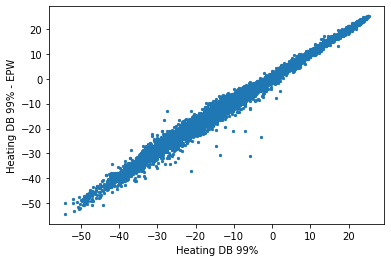

In [24]:
df_results.plot.scatter(x="Heating DB 99%", y="Heating DB 99% - EPW", s=5);

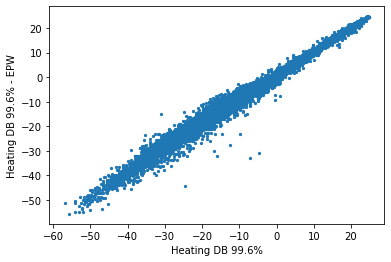

In [25]:
df_results.plot.scatter(x="Heating DB 99.6%", y="Heating DB 99.6% - EPW", s=5);

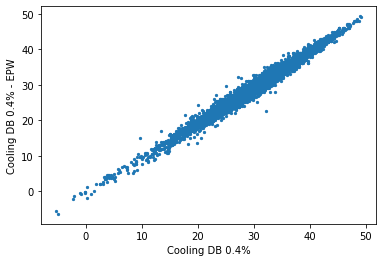

In [26]:
df_results.plot.scatter(x="Cooling DB 0.4%", y="Cooling DB 0.4% - EPW", s=5);

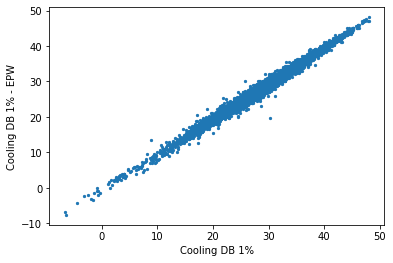

In [27]:
df_results.plot.scatter(x="Cooling DB 1%", y="Cooling DB 1% - EPW", s=5);

In [30]:
#sort by largest to smallest error and plot histogram
df_results= df_results.sort_values(by=['delta - Heating DB 99.6%'], ascending=False)
df_results.head()

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number,Region,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
30192,Capmon.CS-Saturna.Island BC CAN,"['-123.1281', '48.77530', '178.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/BC_British_Columbia/CAN_BC_Capmon.CS-Saturna.Island.719140_TMYx.zip,719140,TMYx,Canada,BC,SATURNA CAPMON,99999,48.7753N,...,-30.9640,-23.300,22.0000,21.000,71,North America,26.3640,20.400,4.7000,3.800
3805,Grimsey.Island NE ISL,"['-18.01700', '66.54400', '17.0']",https://climate.onebuilding.org/WMO_Region_6_Europe/ISL_Iceland/NE_Northland_East/ISL_NE_Grimsey.Island.041650_TMYx.zip,41650,TMYx,Iceland,NaN,GRIMSEY AP,99999,66.544N,...,-33.0000,-30.900,11.4000,10.200,41,Asia,25.8000,25.100,3.4000,3.300
27728,Brockville-Tackaberry.Thousand.Islands.Rgnl.AP ON CAN,"['-75.75160', '44.63540', '121.4']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/ON_Ontario/CAN_ON_Brockville-Tackaberry.Thousand.Islands.Rgnl.AP.711610_TMYx.zip,711610,TMYx,Canada,ON,BROCKVILLE,99999,44.6354N,...,-44.4820,-37.123,28.3964,26.700,71,North America,19.9820,16.023,1.3036,1.500
30325,Cheticamp.CS NS CAN,"['-60.94722', '46.64500', '44.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/NS_Nova_Scotia/CAN_NS_Cheticamp.CS.719590_TMYx.zip,719590,TMYx,Canada,NS,CHETICAMP CS,99999,46.650N,...,-32.2964,-30.800,23.5964,22.100,71,North America,16.2964,17.100,3.7036,3.800
30212,Baccaro.Point NS CAN,"['-65.47170', '43.45080', '5.7']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/NS_Nova_Scotia/CAN_NS_Baccaro.Point.719200_TMYx.zip,719200,TMYx,Canada,NS,BACCARO POINT,99999,43.4508N,...,-27.5892,-21.000,24.2000,22.341,71,North America,15.1892,10.800,-4.2000,-3.441


In [31]:
filename = 'test_03.csv'
export_csv = df_results.to_csv(filename, index = None, header=True)

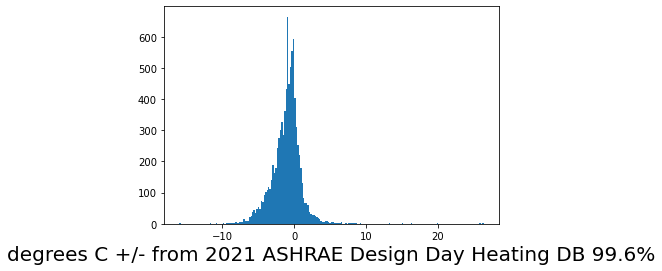

In [29]:
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Heating DB 99.6%',fontsize=20)
n, bins, patches = plt.hist(x= df_results['delta - Heating DB 99.6%'], bins='auto')
plt.rcParams['figure.figsize'] = [20, 12]
#plt.xticks(bins)
plt.show()

In [32]:
#dist = df_results.drop(df_results.columns[0:27],axis=1)
#dist

In [34]:
#fig, ax = plt.subplots()
##dist.plot.kde(ax=ax, legend=False, title='delta Heating/Cooling DD')
#dist.plot.hist(density=True, ax=ax, bins=60, alpha=0.5)
#ax.set_ylabel('Probability')
#ax.grid(axis='y')
##ax.set_facecolor('#d8dcd6')

In [35]:
#dist.describe()

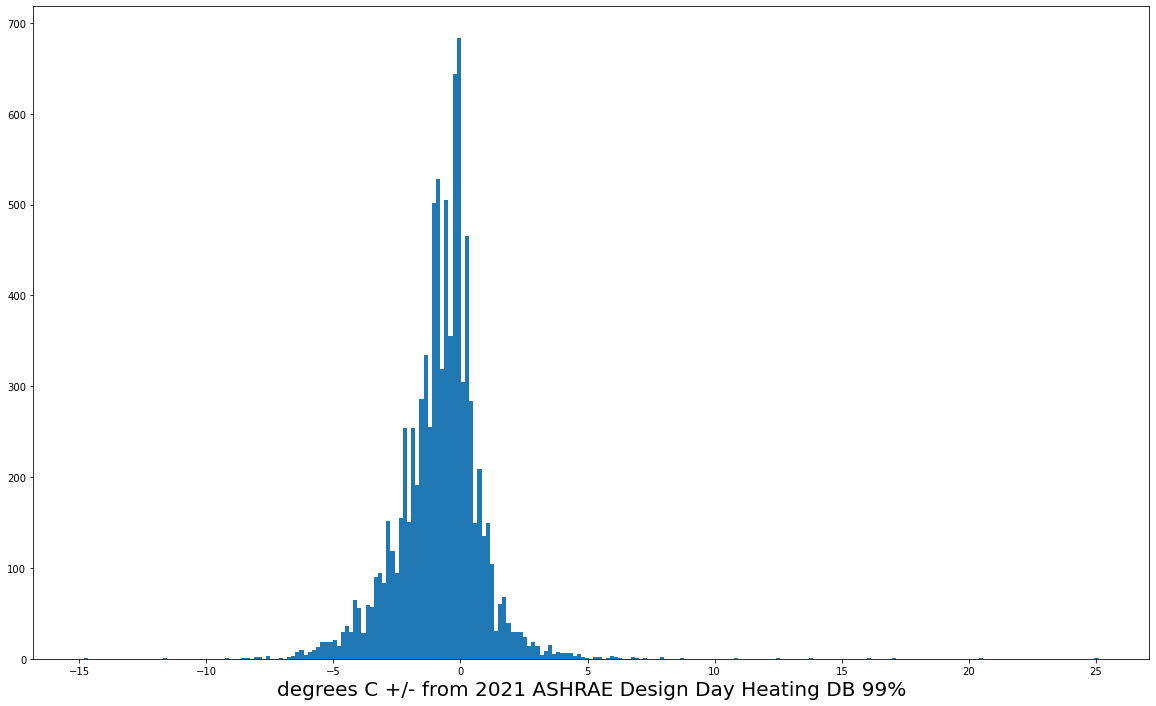

In [36]:
df_results= df_results.sort_values(by=['delta - Heating DB 99%'], ascending=False)
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Heating DB 99%',fontsize=20)
plt.hist(x= df_results['delta - Heating DB 99%'], bins='auto')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

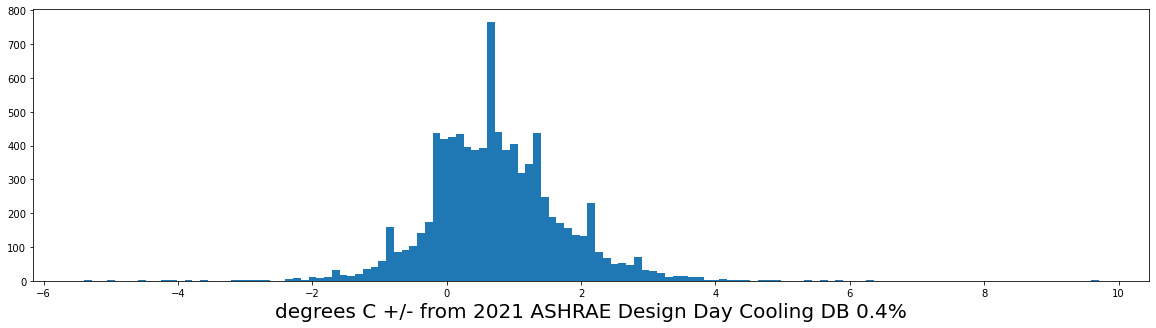

In [37]:
df_results= df_results.sort_values(by=['delta - Cooling DB 0.4%'], ascending=False)
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Cooling DB 0.4%',fontsize=20)
plt.hist(x= df_results['delta - Cooling DB 0.4%'], bins='auto')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

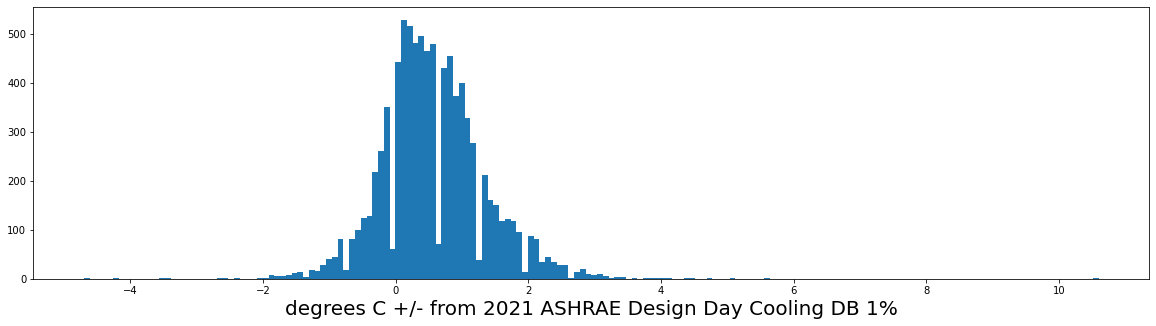

In [38]:
df_results= df_results.sort_values(by=['delta - Cooling DB 1%'], ascending=False)
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Cooling DB 1%',fontsize=20)
plt.hist(x= df_results['delta - Cooling DB 1%'], bins='auto')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

In [39]:
n_by_country = df_results.groupby("Country")["WMO"].count()
n_by_country

Country
Afghanistan          4 
Albania              4 
Algeria              43
American Samoa       1 
Antarctica           49
                     ..
Wallis and Futuna    2 
Western Sahara       1 
Yemen                2 
Zambia               1 
Zimbabwe             2 
Name: WMO, Length: 212, dtype: int64

In [40]:
n_by_region = df_results.groupby("Region")["WMO"].count()
n_by_region

Region
Europe           1974
Asia             2081
Africa           572 
special          3   
North America    2963
South America    321 
Oceania          942 
other            0   
Name: WMO, dtype: int64

In [41]:
df_results.columns

Index(['Location Name', 'Coordinates', 'URL for files', 'WMO', 'last_year',
       'Country', 'State/Province', 'Station', 'WBAN', 'Latitude', 'Longitude',
       'Heating DB 99.6%', 'Heating DB 99%', 'Cooling DB 0.4%',
       'Cooling MCWB 0.4%', 'Cooling DB 1%', 'Cooling MCWB 1%',
       'Cooling DB 2%', 'Cooling MCWB 2%', 'Evaporation WB 0.4%',
       'Evaporation MCDB 0.4%', 'Evaporation WB 1%', 'Evaporation MCDB 1%',
       'Evaporation WB 2%', 'Evaporation MCDB 2%', 'Heating DB 99.6% - EPW',
       'Heating DB 99% - EPW', 'Cooling DB 0.4% - EPW', 'Cooling DB 1% - EPW',
       'Region_number', 'Region', 'delta - Heating DB 99.6%',
       'delta - Heating DB 99%', 'delta - Cooling DB 0.4%',
       'delta - Cooling DB 1%'],
      dtype='object')

In [42]:
df_results = df_results.reset_index()
df_results = df_results.drop(columns=['index'])
df_results.to_csv('All_Results_TMYx.csv')
df_results

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number,Region,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
0,Manyberries.AgCM AB CAN,"['-110.6781', '49.36390', '927.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/AB_Alberta/CAN_AB_Manyberries.AgCM.710510_TMYx.zip,710510,TMYx,Canada,AB,MANYBERRIES AGCM,99999,49.3639N,...,-36.0000,-34.441,22.4964,19.7,71,North America,5.3000,7.841,9.7036,10.6
1,Hope.Rgnl.AP BC CAN,"['-121.4935', '49.36990', '39.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/BC_British_Columbia/CAN_BC_Hope.Rgnl.AP.711870_TMYx.zip,711870,TMYx,Canada,BC,HOPE,99999,49.3699N,...,-23.0000,-20.882,24.9964,23.0,71,North America,13.3000,13.782,5.6036,5.6
2,Walvis.Bay-Pelican.Point ER NAM,"['14.43500', '-22.89200', '91.1']",https://climate.onebuilding.org/WMO_Region_1_Africa/NAM_Namibia/NAM_ER_Walvis.Bay-Pelican.Point.681040_TMYx.zip,681040,TMYx,Namibia,NaN,WALVIS BAY PELICAN POINT,99999,22.892S,...,7.0000,8.100,28.0000,26.0,68,Africa,-1.0000,-0.900,5.8000,5.1
3,Dubawnt.Lake NU CAN,"['-101.7613', '63.22903', '237.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/NU_Nunavut/CAN_NU_Dubawnt.Lake.714999_TMYx.zip,714999,TMYx,Canada,NU,DUBAWNT LAKE,99999,63.230N,...,-38.2000,-37.000,13.5964,12.6,71,North America,-1.7000,-1.300,6.3036,4.7
4,Wutai.Shan SX CHN,"['113.5133', '38.94170', '2210.0']",https://climate.onebuilding.org/WMO_Region_2_Asia/CHN_China/SX_Shanxi/CHN_SX_Wutai.Shan.535880_TMYx.zip,535880,TMYx,China,NaN,WUTAI SHAN,99999,38.9417N,...,-27.6964,-24.900,16.7000,15.5,53,Asia,4.2964,4.000,4.5000,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,Yerevan-Zvartnots.Intl.AP ER ARM,"['44.38300', '40.15000', '854.0']",https://climate.onebuilding.org/WMO_Region_2_Asia/ARM_Armenia/ARM_ER_Yerevan-Zvartnots.Intl.AP.377880_TMYx.zip,377880,TMYx,Armenia,NaN,YEREVAN ZVARTNOTS,99999,40.150N,...,NaN,NaN,NaN,NaN,37,Asia,NaN,NaN,NaN,NaN
8852,Amasia SH ARM,"['43.78300', '40.95000', '1866.0']",https://climate.onebuilding.org/WMO_Region_2_Asia/ARM_Armenia/ARM_SH_Amasia.376820_TMYx.zip,376820,TMYx,Armenia,NaN,AMASIA,99999,40.950N,...,NaN,NaN,NaN,NaN,37,Asia,NaN,NaN,NaN,NaN
8853,Gyumri SH ARM,"['43.85600', '40.76300', '1512.0']",https://climate.onebuilding.org/WMO_Region_2_Asia/ARM_Armenia/ARM_SH_Gyumri.376860_TMYx.zip,376860,TMYx,Armenia,NaN,GYUMRI,99999,40.763N,...,NaN,NaN,NaN,NaN,37,Asia,NaN,NaN,NaN,NaN
8854,Sevan GR ARM,"['44.93300', '40.55000', '1937.0']",https://climate.onebuilding.org/WMO_Region_2_Asia/ARM_Armenia/ARM_GR_Sevan.377090_TMYx.zip,377090,TMYx,Armenia,NaN,SEVAN,99999,40.550N,...,NaN,NaN,NaN,NaN,37,Asia,NaN,NaN,NaN,NaN


In [43]:
df_summary = df_results.drop(columns=['Coordinates','Heating DB 99.6%','Heating DB 99%','Cooling DB 0.4%', 'Cooling MCWB 0.4%', 'Cooling DB 1%',
       'Cooling MCWB 1%', 'Cooling DB 2%', 'Cooling MCWB 2%',
       'Evaporation WB 0.4%', 'Evaporation MCDB 0.4%', 'Evaporation WB 1%',
       'Evaporation MCDB 1%', 'Evaporation WB 2%', 'Evaporation MCDB 2%',
       'Heating DB 99.6% - EPW', 'Heating DB 99% - EPW',
       'Cooling DB 0.4% - EPW', 'Cooling DB 1% - EPW', 'Region_number'])


In [44]:
cnt_min = df_summary.groupby(["Region"]).min()
cnt_min

/var/folders/mk/7yynft554x38v3t6f_65fkzc0000gn/T/ipykernel_29161/401023503.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  cnt_min = df_summary.groupby(["Region"]).min()


,Location Name,URL for files,WMO,last_year,Country,Station,WBAN,Latitude,Longitude,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
Region,,,,,,,,,,,,,
Europe,Aachen NW DEU,https://climate.onebuilding.org/WMO_Region_2_Asia/KAZ_Kazakhstan/AKM_Akmola/KAZ_AKM_Balkashino.289780_TMYx.zip,10010.0,TMYx,Albania,AACHEN,33308.0,34.590N,1.829E,-9.3036,-8.4,-5.4000,-4.7
Asia,Aasiaat-Egedesminde QA GRL,https://climate.onebuilding.org/WMO_Region_2_Asia/AFG_Afghanistan/AFG_BAL_Mazar-i-Sharif.AP.409110_TMYx.zip,30010.0,TMYx,Afghanistan,AASIAAT EGEDESMINDE,16201.0,0.6905S,0.055E,-8.2036,-6.4,-3.6000,-2.7
Africa,Aadorf.Tanikon TG CHE,https://climate.onebuilding.org/WMO_Region_1_Africa/ATF_French_Southern_Territories/ATF_AS_Martin.De.Vivies.Stn-Amsterdam.Island.619960_TMYx.zip,60090.0,TMYx,Algeria,AADORF-TAENIKON,70701.0,0.042N,0.033W,-5.7036,-3.8,-4.0928,-1.9
special,Bagram.AP PAR AFG,https://climate.onebuilding.org/WMO_Region_2_Asia/AFG_Afghanistan/AFG_PAR_Bagram.AP.697284_TMYx.zip,69900.0,TMYx,Afghanistan,BAGRAM,93121.0,34.300N,116.167W,-2.6000,-2.0,0.7000,0.4
North America,Abbeville-Crusta.Meml.AP LA USA,https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/ABW_Aruba/ABW_AA_Queen.Beatrix.Intl.AP.789820_TMYx.zip,70020.0,TMYx,Antigua and Barbuda,ABBEVILLE,102.0,10.595N,0.0000E,-16.0000,-14.8,-5.0000,-4.2
South America,A.Coruna GA ESP,https://climate.onebuilding.org/ATA_ATA_Amery.Ice.Shelf.897670_TMYx.zip,80010.0,TMYx,Antarctica,ALBACETE AP,10502.0,0.0451S,0.475W,-11.7000,-8.5,-1.2964,-1.8
Oceania,Adelaide-Kent.Town SA AUS,https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/BHS_Bahamas/BHS_WB_West.End.Intl.AP.994390_TMYx.zip,910660.0,TMYx,American Samoa,ADELAIDE AP,487.0,0.0657N,100.2892E,-5.5072,-4.3,-3.0000,-2.4
other,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
cnt_region = df_summary.groupby(["Region"])
cnt_region.describe()

WMO                                                    \
                count           mean            std       min       25%   
Region                                                                    
Europe         1974.0  138748.027356  91174.102119   10010.0   28815.0    
Asia           2081.0  387317.789524  161878.394355  30010.0   335870.0   
Africa         572.0   431415.062937  278902.796408  60090.0   66352.5    
special        3.0     485778.000000  360178.576059  69900.0   380025.0   
North America  2963.0  684821.253459  155107.920571  70020.0   715285.0   
South America  321.0   669006.261682  335704.740047  80010.0   800220.0   
Oceania        942.0   957402.462845  23052.005811   910660.0  944292.5   
other          0.0    NaN            NaN            NaN       NaN         

                                               WBAN                ...  \
                    50%       75%       max   count          mean  ...   
Region                                                             ...   
Europe         133763.0  222160.0  299740.0  1974.0  99965.215299  ...   
Asia           425870.0  484210.0  599850.0  2081.0  99537.098991  ...   
Africa         607425.0  650127.5  689940.0  572.0   99947.779720  ...   
special        690150.0  693717.0  697284.0  3.0     97706.333333  ...   
North America  722348.0  725455.0  789900.0  2963.0  57963.145123  ...   
South America  846280.0  875340.0  898790.0  321.0   99415.171340  ...   
Oceania        952045.0  970935.0  998235.0  942.0   98007.153928  ...   
other         NaN       NaN       NaN        0.0    NaN            ...   

              delta - Cooling DB 0.4%         delta - Cooling DB 1%            \
                                  75%     max                 count      mean   
Region                                                                          
Europe         1.90                    4.8000  1974.0                0.841551   
Asia           1.20                    4.5000  2059.0                0.602773   
Africa         1.20                    5.8000  568.0                 0.641107   
special        1.65                    2.3000  3.0                   1.200000   
North America  1.10                    9.7036  2962.0                0.432847   
South America  1.10                    2.9000  317.0                 0.522886   
Oceania        0.80                    3.4000  941.0                 0.336934   
other         NaN                     NaN      0.0                  NaN         

                                                           
                    std  min    25%    50%      75%   max  
Region                                                     
Europe         0.906454 -4.7  0.200  0.900  1.40000  4.1   
Asia           0.695888 -2.7  0.159  0.559  1.00000  4.5   
Africa         0.723716 -1.9  0.200  0.559  1.06925  5.1   
special        1.058301  0.4  0.600  0.800  1.60000  2.4   
North America  0.769105 -4.2  0.000  0.400  0.90000  10.6  
South America  0.643093 -1.8  0.100  0.400  0.90000  2.9   
Oceania        0.599455 -2.4  0.000  0.300  0.60000  3.6   
other         NaN       NaN  NaN    NaN    NaN      NaN    

[8 rows x 48 columns]

In [46]:
cnt_region.describe().to_csv('All_Results_Stats.csv')

In [47]:
cnt_max = df_summary.groupby(["Region"]).max()
cnt_max

/var/folders/mk/7yynft554x38v3t6f_65fkzc0000gn/T/ipykernel_29161/1210112187.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  cnt_max = df_summary.groupby(["Region"]).max()


,Location Name,URL for files,WMO,last_year,Country,Station,WBAN,Latitude,Longitude,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
Region,,,,,,,,,,,,,
Europe,Zyryanka SA RUS,https://climate.onebuilding.org/WMO_Region_6_Europe/TUR_Turkey/ZO_Zonguldak/TUR_ZO_Zonguldak.170220_TMYx.zip,299740.0,TMYx,Turkey,ZYRYANKA,99999.0,80.626N,99.542E,7.6000,6.700,4.8000,4.1
Asia,Zunyi-Huichuan GZ CHN,https://climate.onebuilding.org/WMO_Region_6_Europe/UKR_Ukraine/ZT_Zhytomyrska/UKR_ZT_Zhytomyr.333250_TMYx.zip,599850.0,TMYx,Yemen,ZMEINOGORSK,99999.0,9.946N,99.9976E,25.8000,25.100,4.5000,4.5
Africa,Zuwara NQ LBY,https://climate.onebuilding.org/WMO_Region_6_Europe/NLD_Netherlands/ZH_Zuid-Holland/NLD_ZH_Valkenburg.AP.062100_TMYx.zip,689940.0,TMYx,Zimbabwe,ZUWARA,99999.0,9.350N,9.9881E,9.1964,8.741,5.8000,5.1
special,Vaduz VA LIE,https://climate.onebuilding.org/WMO_Region_6_Europe/LIE_Liechtenstein/LIE_VA_Vaduz.069900_TMYx.zip,697284.0,TMYx,USA,VADUZ,99999.0,47.1275N,9.5175E,1.1000,1.700,2.3000,2.4
North America,Zapata.County.AP TX USA,https://climate.onebuilding.org/WMO_Region_6_Europe/FRA_France/PR_Provence-Alpes-Cote_d-Azur/FRA_PR_Toulon.076600_TMYx.zip,789900.0,TMYx,USA,ZAPATA COUNTY AP,99999.0,9.9892N,99.9686W,26.3640,20.400,9.7036,10.6
South America,Zaragoza.AP AR ESP,https://climate.onebuilding.org/WMO_Region_7_Antarctica/ATA_Antarctica/ATA_ZAF_SANAE.IV.Stn.890040_TMYx.zip,898790.0,TMYx,Venezuela,ZARAGOZA AP,99999.0,9.869S,93.010E,4.5964,3.900,2.9000,2.9
Oceania,Zamboanga.Intl.AP ZAM PHL,https://climate.onebuilding.org/WMO_Region_7_Antarctica/AUS_Australia/AUS_HMD_Heard.Island.The.Spit.949970_TMYx.zip,998235.0,TMYx,Wallis and Futuna,ZAMBOANGA,99999.0,9.806S,98.889E,3.4964,2.441,3.4000,3.6
other,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
cnt_avg = df_summary.groupby(["Region"]).mean()
cnt_avg

,WMO,WBAN,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
Region,,,,,,
Europe,138748.027356,99965.215299,-1.949762,-1.464061,1.080708,0.841551
Asia,387317.789524,99537.098991,-0.788356,-0.534004,0.741343,0.602773
Africa,431415.062937,99947.779720,-0.717137,-0.493607,0.745074,0.641107
special,485778.000000,97706.333333,-0.333333,-0.066667,1.333333,1.200000
North America,684821.253459,57963.145123,-1.016517,-0.773741,0.591192,0.432847
South America,669006.261682,99415.171340,-0.457796,-0.351303,0.643225,0.522886
Oceania,957402.462845,98007.153928,-0.490847,-0.398794,0.420972,0.336934
other,NaN,NaN,NaN,NaN,NaN,NaN


Europe           AxesSubplot(0.1,0.679412;0.235294x0.220588)     
Asia             AxesSubplot(0.382353,0.679412;0.235294x0.220588)
Africa           AxesSubplot(0.664706,0.679412;0.235294x0.220588)
special          AxesSubplot(0.1,0.414706;0.235294x0.220588)     
North America    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
South America    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
Oceania          AxesSubplot(0.1,0.15;0.235294x0.220588)         
other            AxesSubplot(0.382353,0.15;0.235294x0.220588)    
dtype: object

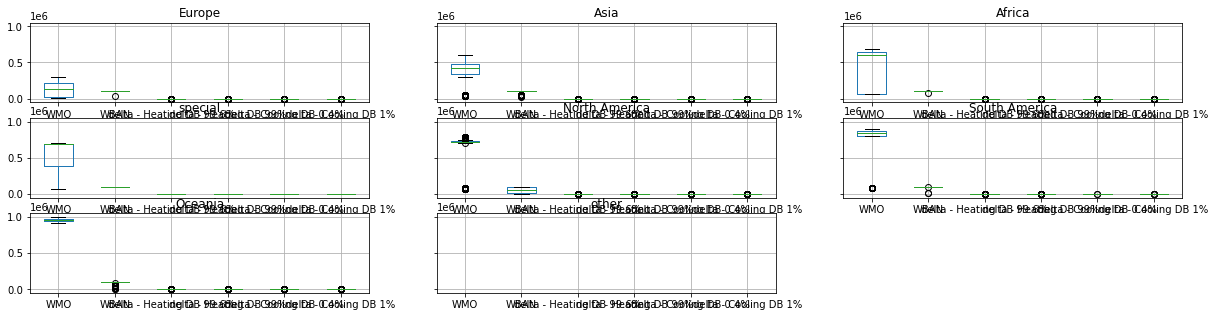

In [49]:
df_summary.groupby(["Region"]).boxplot()

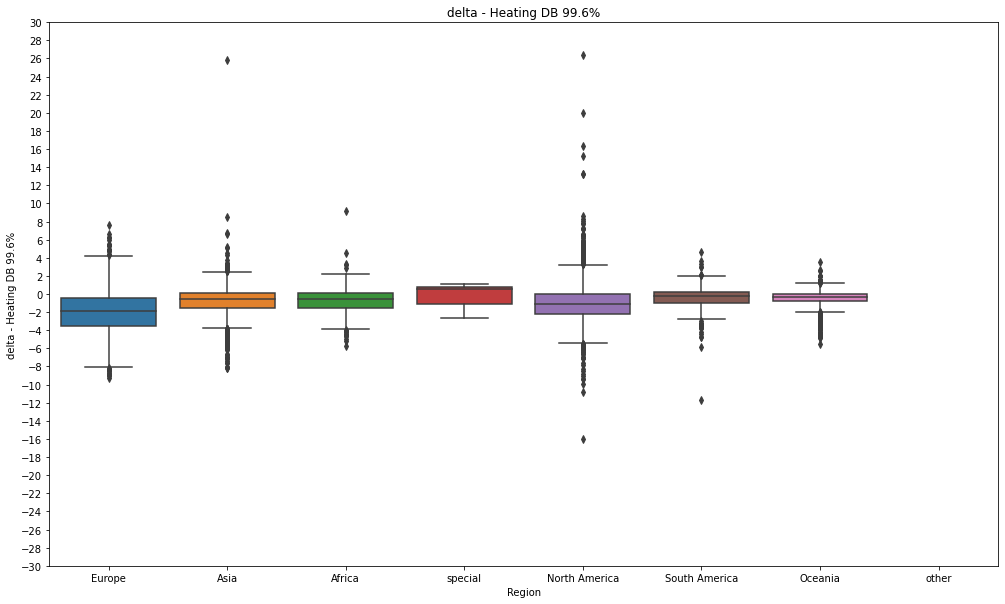

In [50]:
plt.figure(figsize=(17,10))
ax = sns.boxplot(x="Region",y='delta - Heating DB 99.6%', data=df_summary)
ax.set( yticks=np.arange(-30,32,2))
plt.title('delta - Heating DB 99.6%')

plt.show()

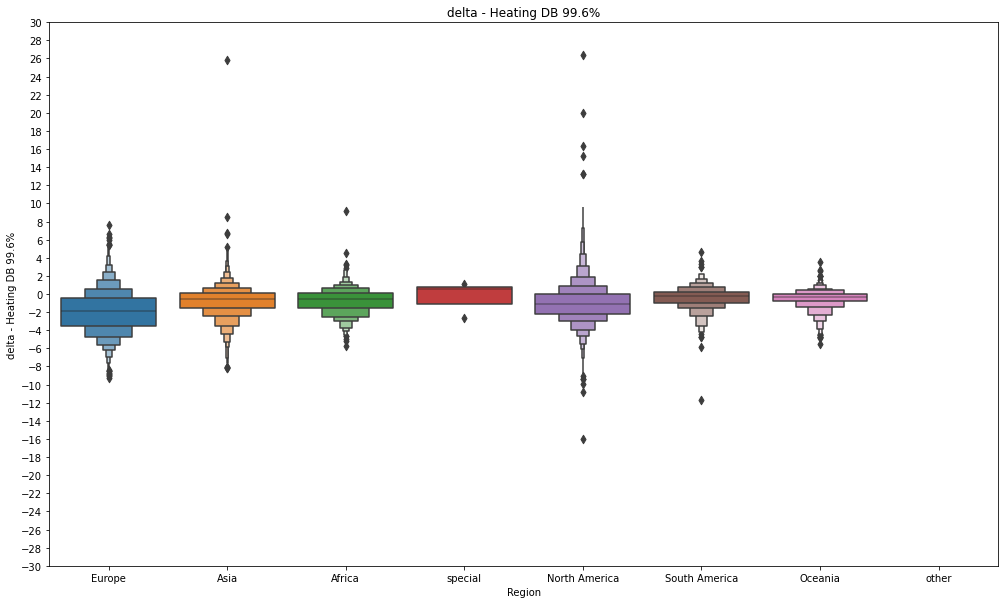

In [51]:
plt.figure(figsize=(17,10))
ax = sns.boxenplot(x="Region",y='delta - Heating DB 99.6%', data=df_summary)
ax.set( yticks=np.arange(-30,32,2))
plt.title('delta - Heating DB 99.6%')

plt.show()

<AxesSubplot:title={'center':'delta - Heating DB 99.6%'}, xlabel='Region'>

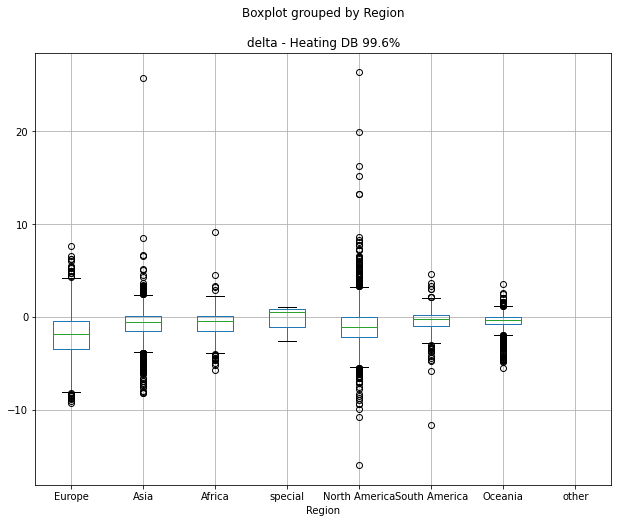

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df_summary.boxplot(column=['delta - Heating DB 99.6%'], by='Region', ax=ax)

In [53]:
df_results= df_results.sort_values(by=['delta - Heating DB 99.6%'], ascending=False)
df_results

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number,Region,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
11,Capmon.CS-Saturna.Island BC CAN,"['-123.1281', '48.77530', '178.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/BC_British_Columbia/CAN_BC_Capmon.CS-Saturna.Island.719140_TMYx.zip,719140,TMYx,Canada,BC,SATURNA CAPMON,99999,48.7753N,...,-30.9640,-23.300,22.0000,21.000,71,North America,26.3640,20.400,4.7000,3.800
17,Grimsey.Island NE ISL,"['-18.01700', '66.54400', '17.0']",https://climate.onebuilding.org/WMO_Region_6_Europe/ISL_Iceland/NE_Northland_East/ISL_NE_Grimsey.Island.041650_TMYx.zip,41650,TMYx,Iceland,NaN,GRIMSEY AP,99999,66.544N,...,-33.0000,-30.900,11.4000,10.200,41,Asia,25.8000,25.100,3.4000,3.300
1036,Brockville-Tackaberry.Thousand.Islands.Rgnl.AP ON CAN,"['-75.75160', '44.63540', '121.4']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/ON_Ontario/CAN_ON_Brockville-Tackaberry.Thousand.Islands.Rgnl.AP.711610_TMYx.zip,711610,TMYx,Canada,ON,BROCKVILLE,99999,44.6354N,...,-44.4820,-37.123,28.3964,26.700,71,North America,19.9820,16.023,1.3036,1.500
12,Cheticamp.CS NS CAN,"['-60.94722', '46.64500', '44.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/NS_Nova_Scotia/CAN_NS_Cheticamp.CS.719590_TMYx.zip,719590,TMYx,Canada,NS,CHETICAMP CS,99999,46.650N,...,-32.2964,-30.800,23.5964,22.100,71,North America,16.2964,17.100,3.7036,3.800
8820,Baccaro.Point NS CAN,"['-65.47170', '43.45080', '5.7']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/NS_Nova_Scotia/CAN_NS_Baccaro.Point.719200_TMYx.zip,719200,TMYx,Canada,NS,BACCARO POINT,99999,43.4508N,...,-27.5892,-21.000,24.2000,22.341,71,North America,15.1892,10.800,-4.2000,-3.441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,Yerevan-Zvartnots.Intl.AP ER ARM,"['44.38300', '40.15000', '854.0']",https://climate.onebuilding.org/WMO_Region_2_Asia/ARM_Armenia/ARM_ER_Yerevan-Zvartnots.Intl.AP.377880_TMYx.zip,377880,TMYx,Armenia,NaN,YEREVAN ZVARTNOTS,99999,40.150N,...,NaN,NaN,NaN,NaN,37,Asia,NaN,NaN,NaN,NaN
8852,Amasia SH ARM,"['43.78300', '40.95000', '1866.0']",https://climate.onebuilding.org/WMO_Region_2_Asia/ARM_Armenia/ARM_SH_Amasia.376820_TMYx.zip,376820,TMYx,Armenia,NaN,AMASIA,99999,40.950N,...,NaN,NaN,NaN,NaN,37,Asia,NaN,NaN,NaN,NaN
8853,Gyumri SH ARM,"['43.85600', '40.76300', '1512.0']",https://climate.onebuilding.org/WMO_Region_2_Asia/ARM_Armenia/ARM_SH_Gyumri.376860_TMYx.zip,376860,TMYx,Armenia,NaN,GYUMRI,99999,40.763N,...,NaN,NaN,NaN,NaN,37,Asia,NaN,NaN,NaN,NaN
8854,Sevan GR ARM,"['44.93300', '40.55000', '1937.0']",https://climate.onebuilding.org/WMO_Region_2_Asia/ARM_Armenia/ARM_GR_Sevan.377090_TMYx.zip,377090,TMYx,Armenia,NaN,SEVAN,99999,40.550N,...,NaN,NaN,NaN,NaN,37,Asia,NaN,NaN,NaN,NaN
